In [1]:
import matplotlib.pyplot as plt # used to plot the diagrams
import numpy as np #used to create arrays
import pandas as pd #used to read the dataset


In [2]:
### 3.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).
import numpy as np
from numpy.linalg import norm
import math
from numpy import arccos, dot

#creating function with matrix A, and row 1 & 2
def row_dot(A, 1, 2):
    try:
        #using the np.dot product function to find the product between two rows 
        return np.dot(r1,r2)
    except Exception as e:
        print(e)

#creating A matrix that is 3x3 to use to test function
A = np.array([[10,21,3], [4,15,6], [1,8,2]])

print("The dot product of row 1 and 2 in matrix A is:",row_dot(A,A[0],A[1]))

SyntaxError: invalid syntax (4074006942.py, line 8)

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
# shows the keys of the dictionary as a list
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [57]:
X = cancer.data
Y = cancer.target

In [4]:
# show the description of the dataset
print(cancer['DESCR'])

#the attributes are the columns. 30 numeric means 30 dimension which will later be brought down to 2 dimensions

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
# create a dataframe where the first attribute will be data and the second will be the column names(feature_names). In the df, the feature names will now be the column names and will have all the data 
# from the data key
breast_df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
breast_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
#load the labels
cancer_labels = cancer.target
cancer_labels.shape

(569,)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(breast_df)

scaled_data = scaler.transform(breast_df)

In [44]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [45]:
# now  apply PCA technique
from sklearn.decomposition import PCA
# the 30 dimensions will be converted to 3 dimensions
pca=PCA(n_components=3)


In [46]:
#now fit scaled data
pca.fit(scaled_data)

PCA(n_components=3)

In [47]:
#using x_pca as variable object for the scaled data with 3 dimensions
x_pca = pca.transform(scaled_data)

In [48]:
# 569 is number of rows and 30 is the number of features or columns
print(scaled_data.shape)

# checking to make sure the dimensions have been scaled down to 3
print(x_pca.shape)

(569, 30)
(569, 3)


In [49]:
breast_df = pd.DataFrame(x_pca, columns=['PCA1', 'PCA2', 'PCA3'])
breast_df

,PCA1,PCA2,PCA3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232789
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459486
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562730
567,10.374794,1.672010,-1.877029


In [59]:
# add class label into dataframe
Y_label = []
for i in Y:
    if i == 0:
        Y_label.append('Benign')
    elif i ==1:
        Y_label.append('Malignant')
Cancer = pd.DataFrame(Y_label, columns=['Cancer'])

breast_cancer = pd.concat([breast_df, Cancer], axis = 1)
breast_cancer

,PCA1,PCA2,PCA3,Cancer
0,9.192837,1.948583,-1.123166,Benign
1,2.387802,-3.768172,-0.529293,Benign
2,5.733896,-1.075174,-0.551748,Benign
3,7.122953,10.275589,-3.232789,Benign
4,3.935302,-1.948072,1.389767,Benign
...,...,...,...,...
564,6.439315,-3.576817,2.459486,Benign
565,3.793382,-3.584048,2.088476,Benign
566,1.256179,-1.902297,0.562730,Benign
567,10.374794,1.672010,-1.877029,Benign


In [60]:
# Explained variance
# Tells how much each principle component contributes to the overall variance of the dataset
explained_variance = pca.explained_variance_ratio_
explained_variance
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.44272026 0.18971182 0.09393163]


The output above shows that principle componenet 1 holds 44.2% of the information, principle component 2 holds 19% of the information, and principle component 3 hold only 9.3% of the information/variance
 - the other point to note is that while projecting thirty-dimensional data to a three-dimensional data, 27.5% information was lost.

<Figure size 432x288 with 0 Axes>

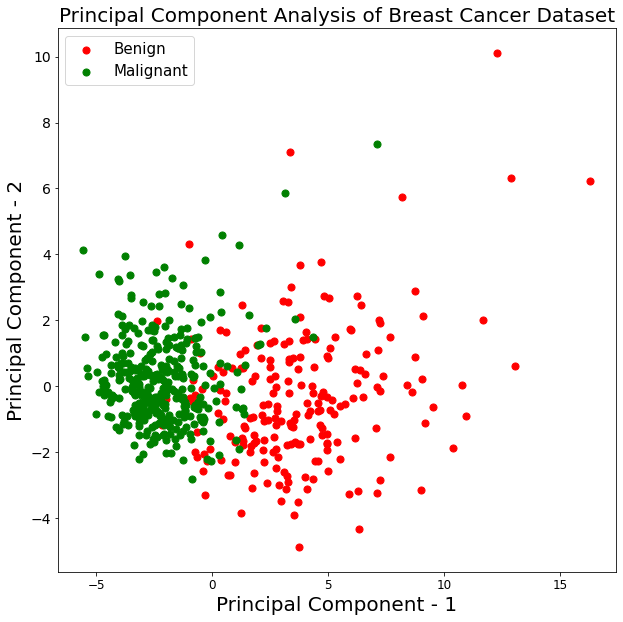

In [71]:
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_cancer['Cancer'] == target
    plt.scatter(breast_cancer.loc[indicesToKeep, 'PCA1']
               , breast_cancer.loc[indicesToKeep, 'PCA3'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})